In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv("/Users/mitchelljohnson/Downloads/DelayedFlights.csv.zip")

# Display first few rows
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [18]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Drop rows where ArrDelay is missing (likely cancelled or diverted flights)
data = data.dropna(subset=["ArrDelay"])

Missing values per column:
 Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [26]:
# Fill missing TailNum with 
data["TailNum"] = data["TailNum"].fillna("Unknown")

In [28]:
# Fill missing AirTime and ActualElapsedTime 
data["AirTime"] = data["AirTime"].fillna(data["AirTime"].median())
data["ActualElapsedTime"] = data["ActualElapsedTime"].fillna(data["ActualElapsedTime"].median())

In [24]:
# Create a binary target variable: 1 if delayed, 0 if not
data["Delayed_Binary"] = (data["ArrDelay"] > 15).astype(int)

In [30]:
# Set target variable
target_column = "Delayed_Binary"
X = data.drop(columns=[target_column, "ArrDelay"])  # Remove target and original delay column
y = data[target_column]

In [104]:
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [100]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Train a Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990340603932697
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6418
           1       1.00      1.00      1.00    243080

    accuracy                           1.00    249498
   macro avg       0.99      0.99      0.99    249498
weighted avg       1.00      1.00      1.00    249498



In [54]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990340603932697
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6418
           1       1.00      1.00      1.00    243080

    accuracy                           1.00    249498
   macro avg       0.99      0.99      0.99    249498
weighted avg       1.00      1.00      1.00    249498



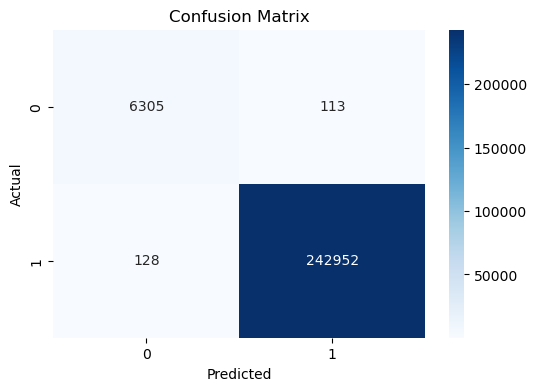

In [56]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


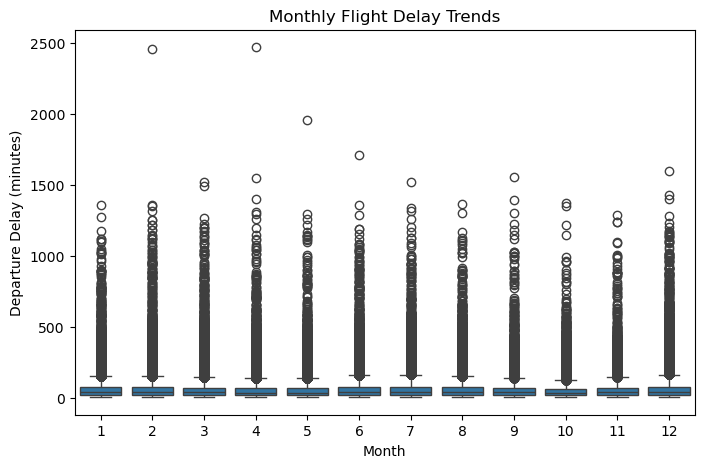

In [64]:
## Flight Delays Over Time (Monthly Trends)
plt.figure(figsize=(8,5))
sns.boxplot(x=data["Month"], y=data["DepDelay"])
plt.xlabel("Month")
plt.ylabel("Departure Delay (minutes)")
plt.title("Monthly Flight Delay Trends")
plt.show()

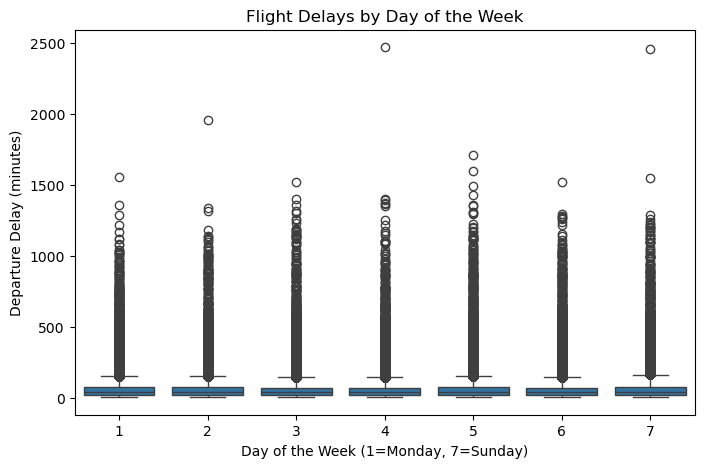

In [66]:
## Day of Week vs. Flight Delays
plt.figure(figsize=(8,5))
sns.boxplot(x=data["DayOfWeek"], y=data["DepDelay"])
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Departure Delay (minutes)")
plt.title("Flight Delays by Day of the Week")
plt.show()

In [78]:
feature_names = X.columns

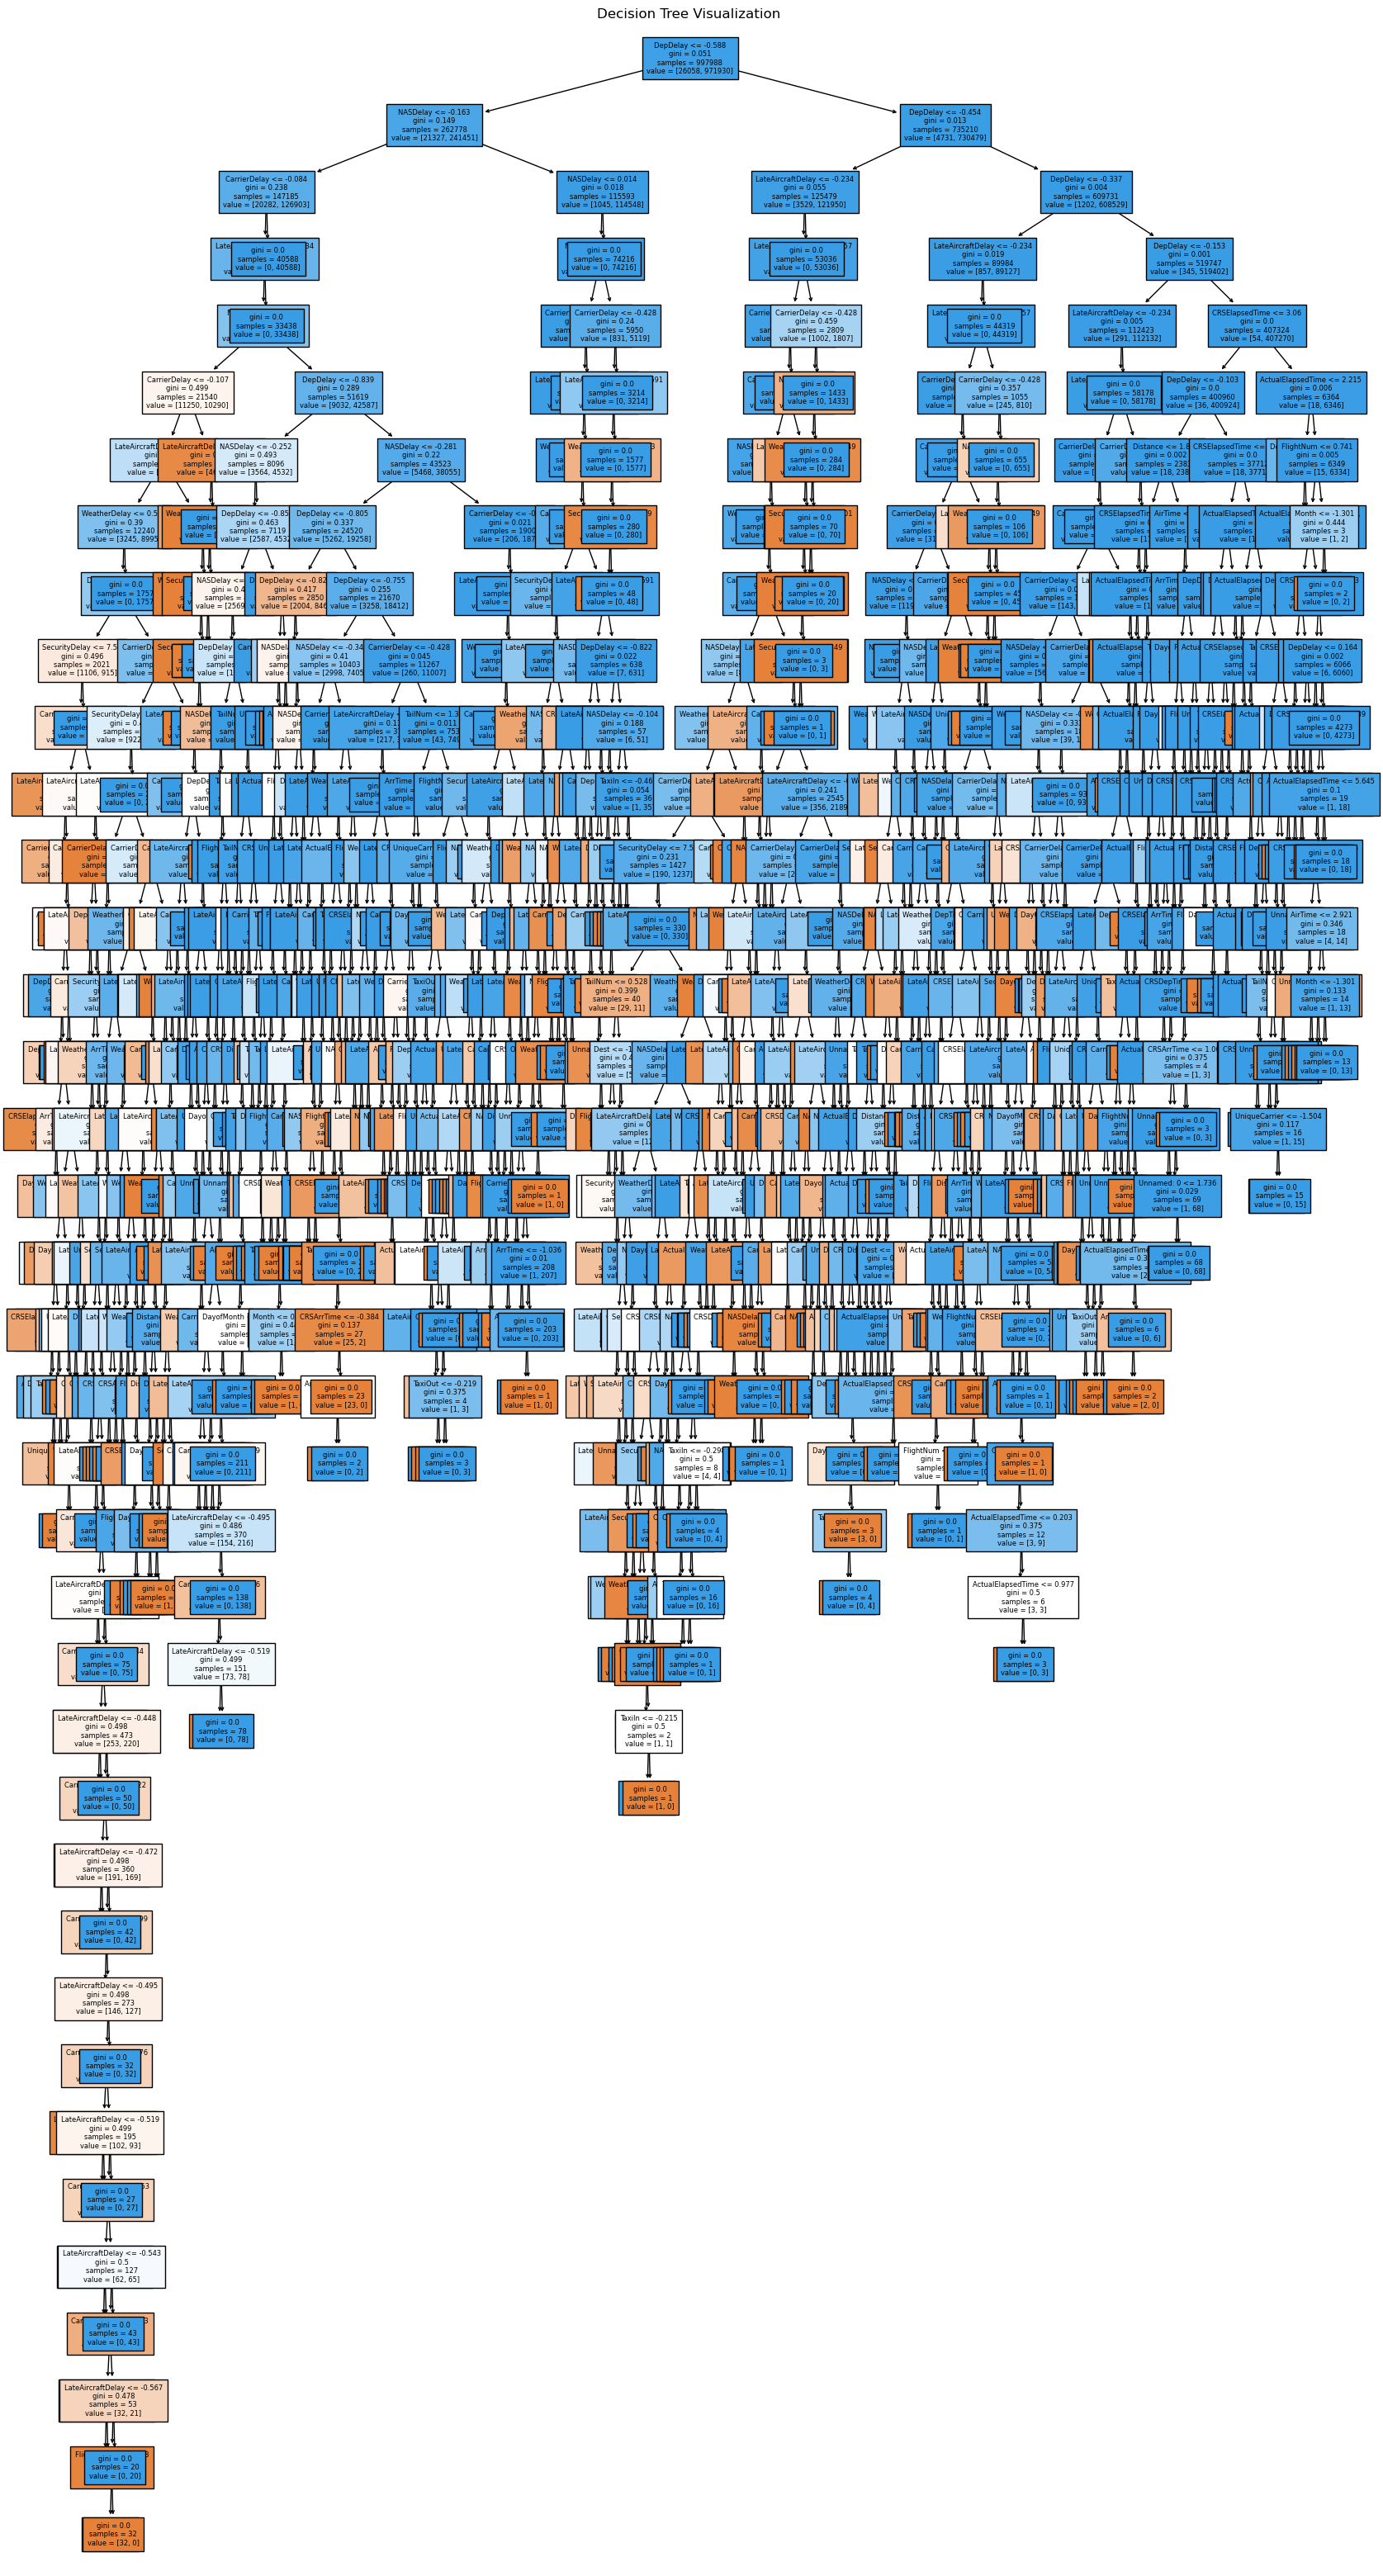

In [94]:
##Didnt wan to use this
import pandas as pd
from sklearn.tree import plot_tree

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)

feature_names_list = list(X_train.columns)

plt.figure(figsize=(20,40))
plot_tree(model, feature_names=feature_names_list, filled=True, fontsize=6)
plt.title("Decision Tree Visualization")
plt.show()

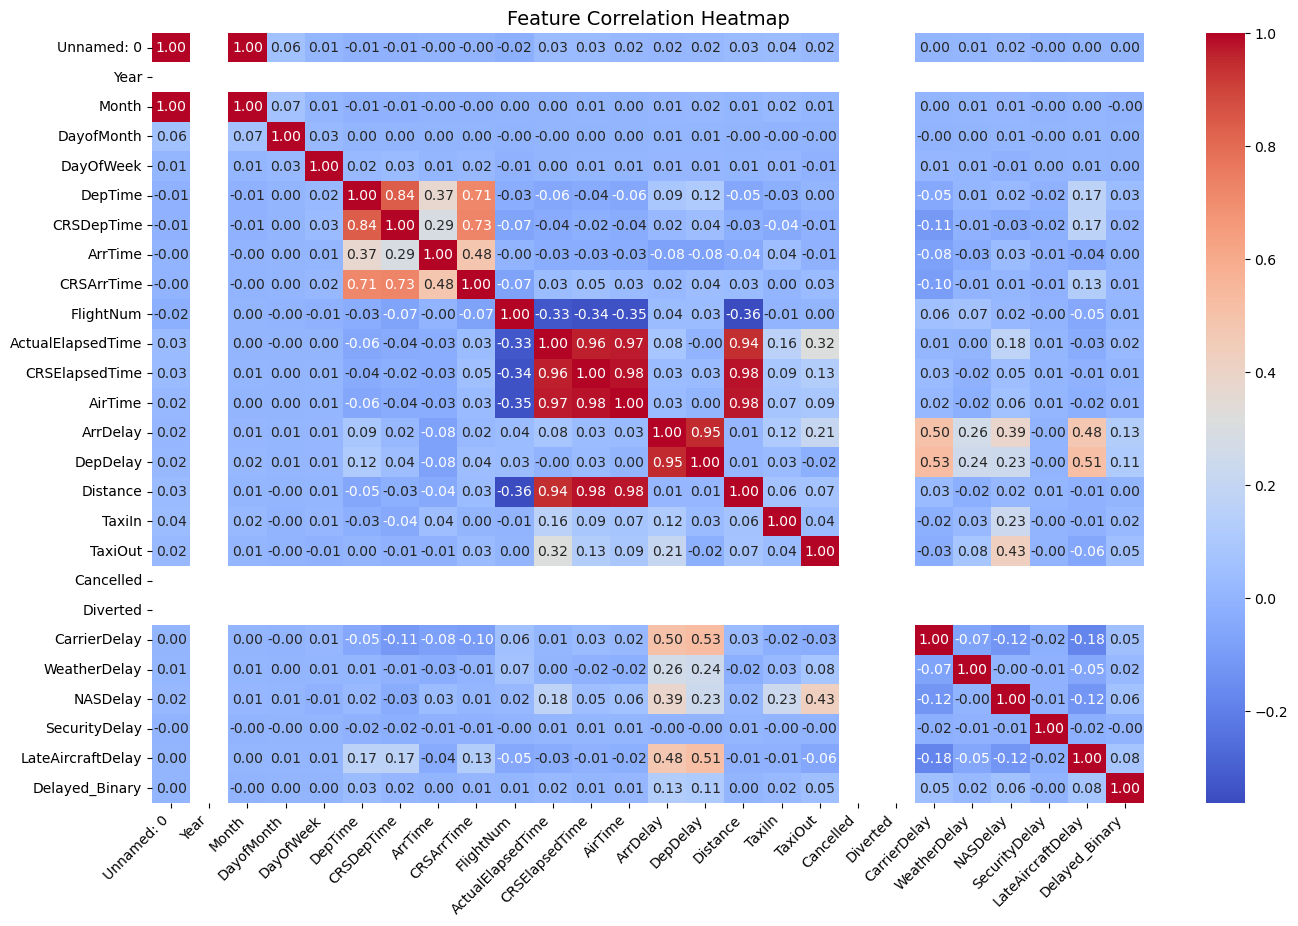

In [96]:
plt.figure(figsize=(16,10))  

numeric_data = data.select_dtypes(include=["number"])

sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 10})

plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)  
plt.title("Feature Correlation Heatmap", fontsize=14)  

plt.show()

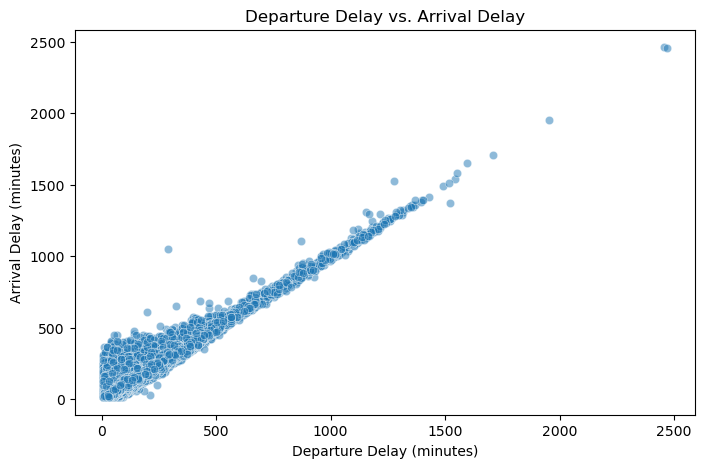

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["DepDelay"], y=data["ArrDelay"], alpha=0.5)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Departure Delay vs. Arrival Delay")
plt.show()